In [1]:
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [3]:
def num_char_certo(y_true:str, y_pred:str):
    count = 0
    for i, letter in enumerate(y_true):
        if letter == y_pred[i]:
            count += 1
    
    count = count / len(y_true)
    return count

In [4]:
def genetic_drift(phrases, seed=2024):
    random.seed(seed)
    new_phrases = []
    for i in range(len(phrases)):
        new_phrases.append(random.choice(phrases))
    return new_phrases

In [5]:
def generate_phrases(phrase, u=0.1, n_phrases=5, gen_max=1e7):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrases = [generate_random_phrase(phrase_size, alphabet) for i in range(n_phrases)]
    new_phrases = initial_phrases
    reached = False
    while True:
        if phrase in new_phrases:
            reached = True
        
        if phrase in new_phrases or gen >= gen_max:
            break
        
        new_phrases = genetic_drift(new_phrases)
        best_phrase = new_phrases[0]
        score = num_char_certo(phrase, best_phrase)
        for i in range(1, n_phrases):
            if num_char_certo(phrase, new_phrases[i]) > score:
                best_phrase = new_phrases[i]
                score = num_char_certo(phrase, best_phrase)
        
        new_phrases = [generate_random_phrase_with_mutation(best_phrase, alphabet=alphabet, u=u) for i in range(n_phrases)]
        gen += 1
    
    return initial_phrases, {"gen": gen, "reached": reached}, new_phrases

In [6]:
def plot_graphs_and_describe(full_gens, u_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"U{u_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.show()

def run_exp(u_list, phrase, qntd_exp):
    print("Generating phrases for different mutation rates: \n", u_list)
    med_gens = []
    full_gens = []
    t1 = time.time()
    for u in u_list:
        gens = []
        t1_epoch = time.time()
        for i in range(qntd_exp):
            initial_phrase, gen, new_phrases = generate_phrases(phrase, u, gen_max=1e7)
            gens.append(gen.get("gen"))
            if not gen.get("reached"):
                print(f"This experiment {i} did not reach the phrase")
        t2_epoch = time.time()
        print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

        med_gens.append(np.mean(gens))
        full_gens.append(gens)
    t2 = time.time()
    print("Mean generations: ", med_gens)
    print("Time taken: ", t2-t1)

    plt.plot(u_list, med_gens)
    plt.plot(u_list, med_gens, '*')
    plt.ylabel("Mean generations")
    plt.xlabel("Mutation rate")
    plt.show()

    plot_graphs_and_describe(full_gens, u_list)

Took 54 generations to generate the phrase 'GAGCCCGAACGAGCTTTGCGTCT' from '['CGCGAGTTAGTTACCAGCGCCGG', 'TTAACTCAAGAGTACGCTGCTCT', 'CCCAGCGAATAGCCTTTTGCACA', 'GGCCGTGGATACTTTCCCCTACG', 'GCGGTCAAACATAGTGTTTCTCG', 'GATAAGGCCGTACCCAACTTTCG', 'TACTATAAATATGATTGCTTTTC', 'TCCGGACACCCCGAAACACCGGG', 'TCCGGACGTCATACGAGGCGGAC', 'TTGATCCGCGTTGAGGATCAGAA', 'AAGAGTAGATGGGATCACTGGGG', 'AGTTTGGGATCGCTTAAGCATAC', 'TCTTTGAATTCTCGTCAAATTCT', 'ATGACCAGATGTGAGTCTAATAG', 'TAGGTTGATACTCGAAAGCGTTA', 'ACAATACTGTATGGTTGAGGAAT', 'GGCGTACCTGCACGATGGGTTAT', 'CGTCTGCTAGCCATCACACGACC', 'CGTGATGGACGCGAGTCATAGTG', 'TGCTATGTACGCTCATTAGAGAA', 'TGGTGTGTAGCGCCATCTGAAAG', 'AGCCTTACTATAGGGGCCGGATA', 'GGAGCGCTTGAAAGCCCATTTAT', 'ATTTCAAGCGCGGGGCGAATCAT', 'TTAATTAAGATCTGAGCGTAAGG', 'AAAAGTGTAAGAGCCGTGTCTCT', 'CGCCATGCGAATGTCAGTACAGT', 'ATCCATGCTACCCCGGCATGGTC', 'GCCTAGTTACGACACGATGCGGG', 'CTAGTCATTTAAATAGTTAAAAC', 'GTTTATTAAAACTCTCAGGGGGA', 'CTGCTGTAGTTTGTACGTCACGA', 'GCGTCTCCCCTAATTGCCTCCAG', 'ATCAAATACAAATACAACACCGT', 'TGCCT

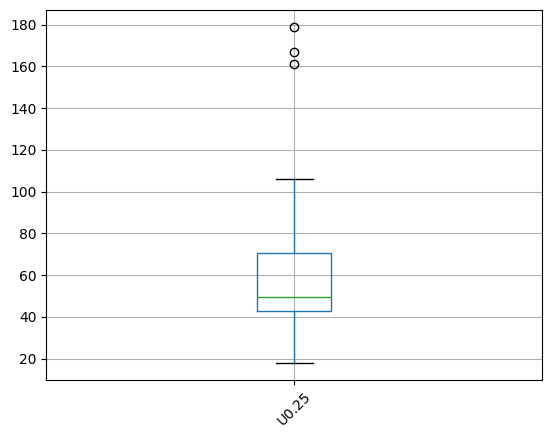

In [8]:
# phrase = 'GAGCCC'
phrase = 'GAGCCCGAACGAGCTTTGCGTCT'
n_phrases = 100
u = 0.25
n_exp = 30

gens = []
for i in range(n_exp):
    initial_phrases, gen, new_phrases = generate_phrases(phrase, u=u, n_phrases=n_phrases)
    gen = gen.get("gen")
    gens.append(gen)

    print(f"Took {gen:,} generations to generate the phrase '{phrase}' from '{initial_phrases}'")
    # print("\n Mutated to '{new_phrases}'")

mean_gen = sum(gens) / len(gens)
print(f"Mean generations: {mean_gen:,}")

plot_graphs_and_describe([gens], [u])

# Outras possibilidades de Deriva

- Roda da Fortuna
- Torneio